In [ ]:
'''
Соколов Михаил Павлович
michael-0801@yandex.ru

https://github.com/smp888/T1.git

Задание 1. Поиск частых наборов

Выполните поиск частых наборов объектов в трех различных наборах
данных с помощью следующих алгоритмов (или их модификаций): Apriori,
FP-Growth, ECLAT. Наборы данных должны существенно отличаться друг от
друга по количеству транзакций и/или типичной длине транзакции
(количеству объектов). Варьируйте пороговое значение поддержки (например:
1%, 3%, 5%, 10%, 15%, 20%). Проверьте идентичность результатов,
полученных с помощью различных алгоритмов.
1. Подготовьте список частых наборов, в которых не более семи объектов
(разумное количество). Проанализируйте и изложите содержательный
смысл полученного результата.
2. Выполните визуализацию полученных результатов в виде следующих
диаграмм:
- сравнение быстродействия алгоритмов на фиксированном наборе данных
при изменяемом пороге поддержки;
- общее количество частых наборов объектов на фиксированном наборе
данных при изменяемом пороге поддержки;
- максимальная длина частого набора объектов на фиксированном наборе
данных при изменяемом пороге поддержки;
- количество частых наборов объектов различной длины на
фиксированном наборе данных при изменяемом пороге поддержки.


'''


In [1]:
# Загрузка набора данных:
# Комментарии на YouTube, классифицированные как спам
# https://archive.ics.uci.edu/ml/datasets/YouTube+Spam+Collection

with open('comments_spam_youtube.txt', 'r') as f:
  data = f.read().splitlines()

# Подготовка и анализ набора данных

import re
# Загрузка списка стоп-слов:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords=stopwords.words()

max=0
min=10000
sum=0
for i in range(len(data)):
  data[i] = data[i].lower() # Перевод всех букв в нижний регистр
  data[i] = re.split(" |,|!|;|:|%|-|_|#|^|&|[|]|{|}|<|>|\"|\.|\ufeff|\?", data[i]) # Разбиение на слова
  data[i] = [word for word in data[i] if not word in stopwords] # Удаление стоп-слов
  data[i] = [x for x in data[i] if len(x)>2] # Удаление коротких слов
  if len(data[i])>max:
    max=len(data[i])
  if (len(data[i])<min) and (len(data[i])>0):
    min=len(data[i])
  if (len(data[i])>0):
    sum=sum+len(data[i])
data = [x for x in data if len(x)>0]
print("Количество транзакций:")
print(len(data))
print("Минимальная длина транзакции:")
print(min)
print("Максимальная длина транзакции:")
print(max)
print("Средняя длина транзакции:")
print(sum/len(data))
print("Пример транзакции:")
print(data[1])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Количество транзакций:
1946
Минимальная длина транзакции:
1
Максимальная длина транзакции:
132
Средняя длина транзакции:
7.775950668036999
Пример транзакции:
['hey', 'guys', 'check', 'new', 'channel', 'first', 'monkeys', "i'm", 'monkey', 'white', 'shirt']


In [107]:
# Загрузка набора данных:
# Отзывы эко-отеля
# https://archive.ics.uci.edu/ml/datasets/Eco-hotel

with open('review_hotel2.txt', 'r') as f:
  data2 = f.read().splitlines()

# Подготовка и анализ набора данных

import re
# Загрузка списка стоп-слов:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords=stopwords.words()

for i in range(len(data2)):
  data2[i] = data2[i].lower() # Перевод всех букв в нижний регистр
  data2[i] = re.split(" |,|!|;|:|%|-|_|#|^|&|[|]|{|}|<|>|\"|\.|\ufeff|\?", data2[i]) # Разбиение на слова
  data2[i] = [word for word in data2[i] if not word in stopwords] # Удаление стоп-слов
  data2[i] = [x for x in data2[i] if len(x)>2] # Удаление коротких слов

# Выбор отзывов определенной длины
data2 = [x for x in data2 if len(x)>10]
data2 = [x for x in data2 if len(x)<200]

# Количественный анализ
max=0
min=10000
sum=0
for i in range(len(data2)):
  if len(data2[i])>max:
    max=len(data2[i])
  if (len(data2[i])<min):
    min=len(data2[i])
  sum=sum+len(data2[i])

print("Количество транзакций:")
print(len(data2))
print("Минимальная длина транзакции:")
print(min)
print("Максимальная длина транзакции:")
print(max)
print("Средняя длина транзакции:")
print(sum/len(data2))
print("Пример транзакции:")
print(data2[1])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Количество транзакций:
295
Минимальная длина транзакции:
11
Максимальная длина транзакции:
182
Средняя длина транзакции:
24.51186440677966
Пример транзакции:
['dream', 'cozy', 'comfortable', 'best', 'personalized', 'employees', 'congratulated', 'nice', 'taste', 'since', 'reception', 'stay', 'welcome', 'tea', 'cake', 'gluten', 'aversion', 'employees', 'already', 'knew', 'waiting', 'carefully', 'night', 'received', 'fire', 'pits', 'wine', 'guests', 'invited', 'participate', 'interact']


In [108]:
# Загрузка набора данных:
# Эмоционально окрашенные предложения на сайтах amazon, imdb, yelp
# https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences

with open('sentences.txt', 'r') as f:
  data3 = f.read().splitlines()

# Подготовка и анализ набора данных

import re
# Загрузка списка стоп-слов:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords=stopwords.words()

for i in range(len(data3)):
  data3[i] = data3[i].lower() # Перевод всех букв в нижний регистр
  data3[i] = re.split(" |,|!|;|:|%|-|_|#|^|&|[|]|{|}|<|>|\"|\.|\ufeff|\?", data3[i]) # Разбиение на слова
  data3[i] = [word for word in data3[i] if not word in stopwords] # Удаление стоп-слов
  data3[i] = [x for x in data3[i] if len(x)>2] # Удаление коротких слов

# Выбор отзывов определенной длины
data3 = [x for x in data3 if len(x)>20]
data3 = [x for x in data3 if len(x)<150]

# Количественный анализ
max=0
min=10000
sum=0
for i in range(len(data3)):
  if len(data3[i])>max:
    max=len(data3[i])
  if (len(data3[i])<min):
    min=len(data3[i])
  sum=sum+len(data3[i])

print("Количество транзакций:")
print(len(data3))
print("Минимальная длина транзакции:")
print(min)
print("Максимальная длина транзакции:")
print(max)
print("Средняя длина транзакции:")
print(sum/len(data3))
print("Пример транзакции:")
print(data3[1])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Количество транзакций:
178
Минимальная длина транзакции:
21
Максимальная длина транзакции:
147
Средняя длина транзакции:
38.264044943820224
Пример транзакции:
['think', 'instructions', 'provided', 'helpful', 'people', 'couldnt', 'hear', 'talk', 'pull', 'earphone', 'talk', 'phone', 'hold', 'charge', 'simple', 'little', 'phone', 'use', 'breakage', 'unacceptible', 'product', 'ideal', 'people', 'like', 'whose', 'ears', 'sensitive']


In [8]:
# Установка библиотеки для алгоритма Apriori
!pip install efficient-apriori
from efficient_apriori import apriori

In [114]:
# Алгоритм Apriori, набор данных №1 - Комментарии
itemsets, rules = apriori(data, min_support=0.04)
for i in range(len(itemsets)):
  print(itemsets[i+1]) 

{('hey',): 85, ('guys',): 103, ('check',): 449, ('channel',): 171, ('subscribe',): 191, ('views',): 89, ('https',): 88, ('like',): 209, ('please',): 174, ('http',): 100, ('//www',): 100, ('music',): 100, ('song',): 261, ('youtube',): 233, ('video',): 278, ('love',): 184}
{('channel', 'check'): 84, ('check', 'video'): 167, ('check', 'youtube'): 189, ('video', 'youtube'): 150}
{('check', 'video', 'youtube'): 128}


In [121]:
# Алгоритм Apriori, набор данных №2 - Отзывы
itemsets, rules = apriori(data2, min_support=0.02)
for i in range(len(itemsets)):
  print(itemsets[i+1]) 

{('everything',): 47, ('staff',): 65, ('food',): 51, ('fire',): 7, ('dйcor',): 22, ('spa',): 16, ('rooms',): 22, ('beach',): 14, ('top',): 7, ('dream',): 10, ('cozy',): 15, ('comfortable',): 6, ('best',): 29, ('personalized',): 6, ('employees',): 7, ('nice',): 32, ('taste',): 6, ('since',): 18, ('reception',): 15, ('stay',): 54, ('welcome',): 7, ('tea',): 7, ('cake',): 6, ('already',): 9, ('night',): 17, ('received',): 8, ('wine',): 10, ('guests',): 15, ('concept',): 12, ('like',): 33, ('made',): 26, ('wonderful',): 49, ('romantic',): 7, ('every',): 28, ('room',): 57, ('incredible',): 7, ('excellent',): 21, ('design',): 12, ('make',): 16, ('memorable',): 8, ('around',): 7, ('amazing',): 49, ('place',): 89, ('special',): 32, ('loved',): 33, ('hope',): 14, ('back',): 54, ('soon',): 22, ('ever',): 11, ('fantastic',): 44, ('attention',): 14, ('treatment',): 6, ('single',): 11, ('details',): 14, ('thought',): 7, ('order',): 6, ('environment',): 17, ('beautiful',): 37, ('places',): 7, ('magi

In [144]:
# Алгоритм Apriori, набор данных №3 - Предложения
itemsets, rules = apriori(data3, min_support=0.03)
for i in range(len(itemsets)):
  print(itemsets[i+1]) 

{('place',): 27, ('way',): 16, ('makes',): 8, ('long',): 7, ('would',): 31, ('last',): 7, ('went',): 13, ('could',): 21, ('get',): 20, ('bought',): 7, ('use',): 19, ('absolutely',): 12, ('loved',): 8, ('think',): 15, ('people',): 12, ('hear',): 7, ('talk',): 8, ('phone',): 36, ('charge',): 7, ('little',): 17, ('product',): 14, ('like',): 44, ('car',): 7, ('two',): 15, ('years',): 8, ('charger',): 8, ('well',): 28, ('make',): 19, ('never',): 18, ('buy',): 12, ('different',): 6, ('big',): 12, ('week',): 6, ('gets',): 7, ('found',): 7, ('best',): 14, ("i've",): 16, ('far',): 9, ('quality',): 25, ("i'm",): 19, ('love',): 13, ('headset',): 12, ('bluetooth',): 7, ('great',): 27, ('good',): 45, ('ear',): 12, ('piece',): 12, ('camera',): 9, ('work',): 21, ('sound',): 16, ('excellent',): 10, ('call',): 8, ('waste',): 20, ('calls',): 9, ('disappointed',): 13, ('hours',): 7, ('got',): 21, ('time',): 37, ('poor',): 13, ('screen',): 9, ('black',): 8, ('problem',): 7, ('put',): 9, ('slow',): 11, ('e

In [6]:
# Установка библиотеки для алгоритма FP-Growth
!git clone https://github.com/calee0219/Python3-Fp-growth.git
!cd Python3-Fp-growth/
!python setup.py install
from fp_growth import find_frequent_itemsets

fatal: destination path 'Python3-Fp-growth' already exists and is not an empty directory.
python3: can't open file 'setup.py': [Errno 2] No such file or directory


In [88]:
# Алгоритм FP-Growth, набор данных №1 - Комментарии
itemsets=find_frequent_itemsets(data, 0.04)
itemsets=list(itemsets)
for i in range(7):
  print(i)
  for l in range(len(itemsets)):
    if len(itemsets[l])==i:
      print(itemsets[l])

0
1
['check']
['channel']
['guys']
['new']
['hey']
['subscribe']
['views']
['https']
['like']
['please']
['amp']
['http']
['//www']
['music']
['song']
['youtube']
['video']
['get']
['love']
['katy']
['quot']
2
['check', 'channel']
['subscribe', 'channel']
['please', 'channel']
['check', 'guys']
['please', 'subscribe']
['like', 'please']
['check', 'please']
['amp', 'http']
['http', '//www']
['check', 'youtube']
['video', 'youtube']
['check', 'video']
['song', 'love']
3
['check', 'amp', 'http']
['check', 'video', 'youtube']
4
5
6


In [113]:
# Алгоритм FP-Growth, набор данных №2 - Отзывы
itemsets=find_frequent_itemsets(data2, 0.1)
itemsets=list(itemsets)
for i in range(7):
  print(i)
  for l in range(len(itemsets)):
    if len(itemsets[l])==i:
      print(itemsets[l])

0
1
['staff']
['food']
['everything']
['stay']
['nice']
['best']
['like']
['made']
['room']
['wonderful']
['every']
['place']
['amazing']
['back']
['special']
['loved']
['fantastic']
['beautiful']
['seixo']
['experience']
['would']
['thank']
['areas']
['feel']
['love']
['service']
['restaurant']
['perfect']
['time']
['great']
2
['place', 'amazing']
['place', 'back']
['place', 'special']
['thank', 'special']
['areas', 'seixo']
['place', 'thank']
['place', 'service']
3
['place', 'thank', 'special']
['thank', 'areas', 'seixo']
4
5
6


In [115]:
# Алгоритм FP-Growth, набор данных №3 - Предложения
itemsets=find_frequent_itemsets(data3, 0.3)
itemsets=list(itemsets)
for i in range(7):
  print(i)
  for l in range(len(itemsets)):
    if len(itemsets[l])==i:
      print(itemsets[l])

0
1
['like']
['phone']
['good']
['bad']
['movie']
['film']
2
['bad', 'like']
['movie', 'like']
['movie', 'bad']
['movie', 'film']
['bad', 'film']
3
['movie', 'bad', 'like']
['movie', 'bad', 'film']
4
5
6


In [2]:
# Установка библиотеки для алгоритма ECLAT
!pip install pyECLAT
from pyECLAT import ECLAT
import pandas as pd 

In [4]:
# Алгоритм ECLAT, набор данных №1 - Комментарии
eclat_instance = ECLAT(data=pd.DataFrame(data), verbose=True)
get_ECLAT_indexes, get_ECLAT_supports = eclat_instance.fit(min_support=0.04,
                                                           separator=' & ',
                                                           verbose=True)
for e in get_ECLAT_supports:
  print(e)

100%|██████████| 4006/4006 [00:01<00:00, 2311.44it/s]


Combination 1 by 1


16it [00:04,  3.97it/s]


Combination 2 by 2


120it [00:15,  7.74it/s]


Combination 3 by 3


560it [01:10,  7.97it/s]

subscribe
hey
music
video
youtube
https
like
check
please
channel
love
http
guys
//www
views
song
video & youtube
video & check
youtube & check
check & channel
video & youtube & check


In [ ]:
# Алгоритм ECLAT, набор данных №2 - Отзывы
eclat_instance = ECLAT(data=pd.DataFrame(data2), verbose=True)
get_ECLAT_indexes, get_ECLAT_supports = eclat_instance.fit(min_support=0.04,
                                                           separator=' & ',
                                                           verbose=True)
for e in get_ECLAT_supports:
  print(e)

In [ ]:
# Алгоритм ECLAT, набор данных №3 - Предложения
eclat_instance = ECLAT(data=pd.DataFrame(data3), verbose=True)
get_ECLAT_indexes, get_ECLAT_supports = eclat_instance.fit(min_support=0.04,
                                                           separator=' & ',
                                                           verbose=True)
for e in get_ECLAT_supports:
  print(e)

In [ ]:
'''
В результате выполнения поиска частых наборов в текстах ессественного языка из различных областей 
были получены частые наборы слов, характерные для соответствующей темы, например:
Для комментариев на YouTube: "check, chanell"(зайти на канал) и "please, subcribe"(просьба подписаться)
Для отзывов на отель: "amazing, fantastic, place"(восторженный отзыв об этом месте)
Для эмоционально окрашенных предложений: "acting, bad, movie, plot"(отрицательный отзыв о фильме, игре актеров, сюжете)
'''

In [ ]:
# Измерения
# 1. Измерение быстродействия

In [25]:
import time

In [40]:
start_time = time.time()
itemsets, rules = apriori(data, min_support=0.1)
print("--- %s ms ---" % ((time.time() - start_time)*1000))

--- 17.455577850341797 ms ---


In [104]:
start_time = time.time()
itemsets=find_frequent_itemsets(data, 0.1)
print("--- %s ms ---" % ((time.time() - start_time)*1000))

--- 0.09942054748535156 ms ---


In [11]:
start_time = time.time()
eclat_instance = ECLAT(data=pd.DataFrame(data), verbose=True)
get_ECLAT_indexes, get_ECLAT_supports = eclat_instance.fit(min_support=0.015,
                                                           separator=' & ',
                                                           verbose=True)
print("--- %s ms ---" % ((time.time() - start_time)*1000))

100%|██████████| 4006/4006 [00:01<00:00, 2228.82it/s]


Combination 1 by 1


16it [00:04,  4.00it/s]


Combination 2 by 2


120it [00:15,  7.78it/s]


Combination 3 by 3


560it [01:11,  7.88it/s]


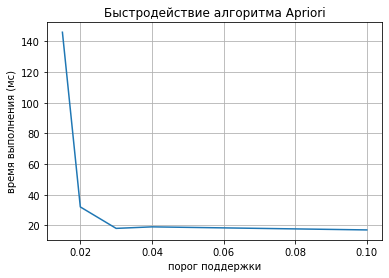

In [41]:
import numpy as np
import matplotlib.pyplot as plt

x = [0.015, 0.02, 0.03, 0.04, 0.1]
y = [146,   32,   18,   19,   17]

fig, ax = plt.subplots()

ax.plot(x, y)
ax.grid()

ax.set_xlabel('порог поддержки')
ax.set_ylabel('время выполнения (мс)')

ax.set_title('Быстродействие алгоритма Apriori')

plt.show()

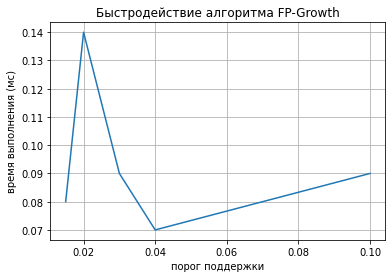

In [105]:
x = [0.015, 0.02, 0.03, 0.04, 0.1]
y = [0.08,   0.14,   0.09,   0.07,   0.09]

fig, ax = plt.subplots()

ax.plot(x, y)
ax.grid()

ax.set_xlabel('порог поддержки')
ax.set_ylabel('время выполнения (мс)')

ax.set_title('Быстродействие алгоритма FP-Growth')

plt.show()

In [122]:
# 2. Измерение количества наборов
sum=0
itemsets, rules = apriori(data, min_support=0.1)
for i in range(len(itemsets)):
  sum=sum+len(itemsets[i+1])
print(sum)

5


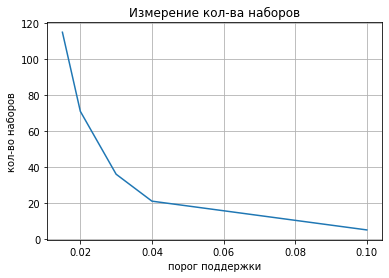

In [124]:
x = [0.015, 0.02, 0.03, 0.04, 0.1]
y = [115,   71,   36,   21,   5]

fig, ax = plt.subplots()

ax.plot(x, y)
ax.grid()

ax.set_xlabel('порог поддержки')
ax.set_ylabel('кол-во наборов')

ax.set_title('Измерение кол-ва наборов')

plt.show()

In [132]:
# 3. Измерение максимальной длины набора
itemsets, rules = apriori(data, min_support=0.07)
for i in range(len(itemsets)):
  print(i+1)


1
2


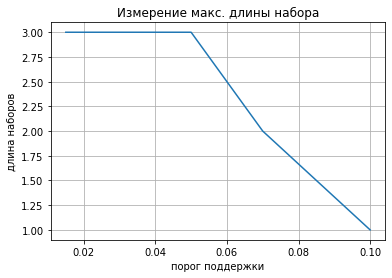

In [147]:
x = [0.015, 0.02, 0.03, 0.04, 0.05, 0.07, 0.1]
y = [3,     3,    3,    3,    3,    2,    1]

fig, ax = plt.subplots()

ax.plot(x, y)
ax.grid()

ax.set_xlabel('порог поддержки')
ax.set_ylabel('длина наборов')

ax.set_title('Измерение макс. длины набора')

plt.show()

In [152]:
# 3. Измерение количества наборов различной длины
itemsets, rules = apriori(data, min_support=0.1)
for i in range(len(itemsets)):
  print(i+1)
  print(len(itemsets[i+1]))

1
5


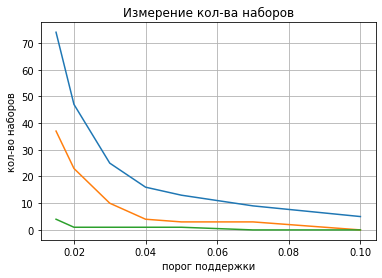

In [153]:
x = [0.015, 0.02, 0.03, 0.04, 0.05, 0.07, 0.1]
y1 = [74,    47,    25,    16,    13,    9,     5]
y2 = [37,    23,    10,    4,     3,     3,     0]
y3 = [4,     1,     1,     1,     1,     0,     0]

fig, ax = plt.subplots()

ax.plot(x, y1)
ax.plot(x, y2)
ax.plot(x, y3)
ax.grid()

ax.set_xlabel('порог поддержки')
ax.set_ylabel('кол-во наборов')

ax.set_title('Измерение кол-ва наборов')

plt.show()